# Clustering Analysis

## Hierarchical Density-Based Spatial Clustering of Applications with Noise (HDBSCAN)

An extension to Density-Based Spatial Clustering of Applications with Noise (DBSCAN). Python based package published in 2013.

- clustering based on varying density
- highly scalable -> easily add new dimension/parameter to data
- Only single parameter need to be tuned to obtain the clustering, minimum number of cluster size

This can be a much more efficient "cut-based" method usually done in selecting events in physics experiments. Result in a more cleaner cut than previous methods.

As this is an "unsupervised training" method, we can potentially used this method to obtain new class of events that are unique to others by going each of the classes found.

In [1]:
%%time

from root_pandas import read_root
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (10.0, 8.0)

file_piled = "Piled_2.root"
file_flat = "Flat.root"
file_alpha = "Alpha_11.root"
file_ls = "LS.root"
file_ls_beta = "LS_BETA.root"
file_ref = "RefPulse.root"

file_pre_analysis = "Run009-230-001.root"

files = ["CAT.root"]

def reshape_PSD(x,n,l):
    return x.PSDPara.values.reshape(n,l)

def reshape_Energy(x,n,l):
    return x.Energy.values.reshape(n,l)

def reshape_PSDDoubleP(x,n,l):
    return x.PSDDoubleP.values.reshape(n,l)

def reshape_RatioR(x,n,l):
    return x.RatioR.values.reshape(n,l)

def reshape_DataQuality(x,n,l):
    return x.DataQuality.values.reshape(n,l)
    
PSDPara1 = np.array([])
PSDPara4 = np.array([])
PSDPara7 = np.array([])
PSDPara10 = np.array([])
PSDPara13 = np.array([])
PSDPara18 = np.array([])
Energy = np.array([])
PSDDoubleP = np.array([])
RatioR = np.array([])
Ratio4us = np.array([])
Ratio = np.array([])
DataQuality0 = np.array([])
DataQuality1 = np.array([])
DataQuality2 = np.array([])
DataQuality3 = np.array([])


Label = []

tree = "tree"
for p in files:
    print(p)
    x = read_root(p, tree, columns=["PSDPara"], flatten=["PSDPara"])
    x1 = read_root(p, tree, columns=["Energy"], flatten=["Energy"])
    x2 = read_root(p, tree, columns=["PSDDoubleP"], flatten=["PSDDoubleP"])
    x3 = read_root(p, tree, columns=["RatioR"], flatten=["RatioR"])
    x4 = read_root(p, tree, columns=["Ratio4us"])
    x5 = read_root(p, tree, columns=["Ratio"])
    x6 = read_root(p, tree, columns=["DataQuality"], flatten=["DataQuality"])
    l,h = x.shape
    li=int(l/34)
    y = reshape_PSD(x, li, 34)
    y1 = reshape_Energy(x1, li, 3)
    y2 = reshape_PSDDoubleP(x2, li, 22)
    y3 = reshape_RatioR(x3, li, 3)
    y4 = reshape_DataQuality(x6,li, 4)
    PSDPara1 = np.concatenate((PSDPara1, y[:,1]), axis=0)
    PSDPara4 = np.concatenate((PSDPara4, y[:,4]), axis=0)
    PSDPara7 = np.concatenate((PSDPara7, y[:,7]), axis=0)
    PSDPara10 = np.concatenate((PSDPara10, y[:,10]), axis=0)
    PSDPara13 = np.concatenate((PSDPara13, y[:,13]), axis=0)
    PSDPara18 = np.concatenate((PSDPara18, y[:,18]), axis=0)
    Energy = np.concatenate((Energy, y1[:,1]), axis=0)
    PSDDoubleP = np.concatenate((PSDDoubleP, y2[:,16]), axis=0)
    RatioR = np.concatenate((RatioR, y3[:,1]), axis=0)
    Ratio4us = np.concatenate((Ratio4us, np.squeeze(x4)),axis=0)
    Ratio = np.concatenate((Ratio, np.squeeze(x5)), axis=0)
    DataQuality0 = np.concatenate((DataQuality0, y4[:,0]), axis=0)
    DataQuality1 = np.concatenate((DataQuality1, y4[:,1]), axis=0)
    DataQuality2 = np.concatenate((DataQuality2, y4[:,2]), axis=0)
    DataQuality3 = np.concatenate((DataQuality3, y4[:,3]), axis=0)
    Label.append(li)
    
data_Label = np.array([])
dummy = np.arange(1)

for i in range(1):
    z = np.full((Label[i], ), dummy[i])
    data_Label = np.concatenate((data_Label, z),axis=0)

PSDPara1 = np.expand_dims(PSDPara1, axis=1)
PSDPara4 = np.expand_dims(PSDPara4, axis=1)
PSDPara7 = np.expand_dims(PSDPara7, axis=1)
PSDPara10 = np.expand_dims(PSDPara10, axis=1)
PSDPara13 = np.expand_dims(PSDPara13, axis=1)
PSDPara18 = np.expand_dims(PSDPara18, axis=1)
Energy = np.expand_dims(Energy, axis=1)
PSDDoubleP = np.expand_dims(PSDDoubleP, axis=1)
RatioR = np.expand_dims(RatioR, axis=1)
Ratio4us = np.expand_dims(Ratio4us, axis=1)
Ratio = np.expand_dims(Ratio, axis=1)
DataQuality0 = np.expand_dims(DataQuality0, axis=1)
DataQuality1 = np.expand_dims(DataQuality1, axis=1)
DataQuality2 = np.expand_dims(DataQuality2, axis=1)
DataQuality3 = np.expand_dims(DataQuality3, axis=1)

DataQuality = np.concatenate((DataQuality0,DataQuality1,DataQuality2,DataQuality3),axis=1)
data = np.concatenate((PSDPara1, PSDPara7, PSDPara13, Energy, PSDDoubleP, RatioR, Ratio4us, Ratio), axis=1)
print(data.shape)

Welcome to JupyROOT 6.10/02
CAT.root
(774023, 8)
CPU times: user 21.5 s, sys: 2.03 s, total: 23.5 s
Wall time: 24.5 s


# Delete ugly data 

In [2]:
%%time
print(data.shape)
DATA = np.array([])
l=0
for i in range(len(data)):
    if (DataQuality[i,0]==0 and DataQuality[i,1]==0 and DataQuality[i,2]==0 and DataQuality[i,3]==0):
        DATA = np.concatenate((DATA, data[i]),axis=0)
        l+=1
DATA=DATA.reshape(l,8)
print(DATA.shape)

(774023, 8)
(428296, 8)
CPU times: user 16min 44s, sys: 9min 34s, total: 26min 19s
Wall time: 26min 12s


# Approx. 800k events ~ PerSubRun ~ one day

add DataQuality?
add trigger condition?

 0 - PSDPara[1]
 1 - PSDPara[4]
 2 - PSDPara[7]
 3 - PSDPara[10]
 4 - PSDPara[13]
 5 - PSDPara[18]
 6 - Energy
 7 - PSDDoubleP[16]
 8 - RatioR
 9 - Ratio4us
 10 - Ratio
 11 - DataQuality0
 12 - DataQuality1
 13 - DataQuality2
 14 - DataQuality3


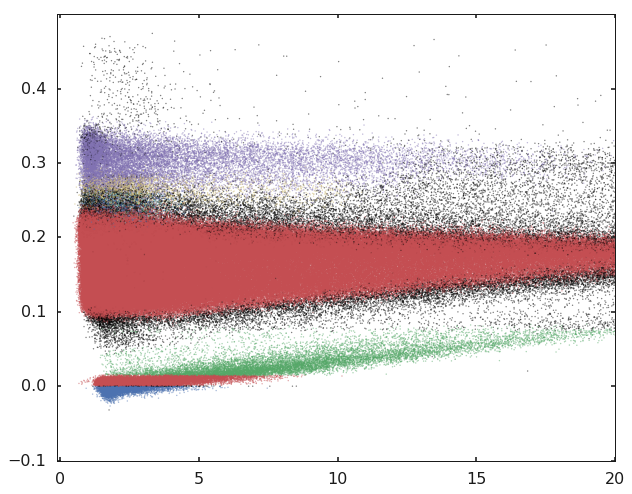

CPU times: user 47.8 s, sys: 18.6 s, total: 1min 6s
Wall time: 1min 25s


In [9]:
%%time
# from sklearn import neighbors

# n_neighbors = 15

# clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform').fit(data,data_Label)

# h = .2

# x_min, x_max = data.min() - 1, data.max() + 1
# y_min, y_max = data.min() - 1, data.max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))
# Z = clf.predict(data)
# print(z)
# Z = Z.reshape(xx.shape)
# plt.figure()
# plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# plt.scatter(data[:1000, 0], data[:1000, 2], c=y, cmap=cmap_bold,
#             edgecolor='k', s=20)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.show()
import time
import seaborn as sns
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.8, 's' : 5, 'linewidths':0}
import hdbscan

print(" 0 - PSDPara[1]\n 1 - PSDPara[4]\n 2 - PSDPara[7]\n 3 - PSDPara[10]\n 4 - PSDPara[13]\n 5 - PSDPara[18]\n 6 - Energy\n 7 - PSDDoubleP[16]\n 8 - RatioR\n 9 - Ratio4us\n 10 - Ratio\n 11 - DataQuality0\n 12 - DataQuality1\n 13 - DataQuality2\n 14 - DataQuality3")

clusters_labels = hdbscan.HDBSCAN(min_cluster_size=200).fit_predict(DATA)

plt.figure()
palette = sns.color_palette("deep", np.unique(clusters_labels).max()+1)
colors = [palette[x] if x>=0 else (0,0,0) for x in clusters_labels]
plt.scatter(DATA[:,0], DATA[:,5], c=colors, s=2, lw=0, alpha=0.5)
plt.xlim(-0.1,20)
plt.ylim(-0.1,0.5)
plt.show()

# print(clusters_labels[:1000])
# def plot_clusters(data, algorithm, args, kwds):
#     start_time = time.time()
#     labels = algorithm(*args, **kwds).fit_predict(data)
#     end_time = time.time()
#     palette = sns.color_palette('deep', np.unique(labels).max() + 1)
#     colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
#     plt.scatter(data[:,0], data[:,9], c=colors, **plot_kwds)
#     frame = plt.gca()
#     frame.axes.get_xaxis().set_visible(False)
#     frame.axes.get_yaxis().set_visible(False)
# #     plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
# #     plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
#     plt.ylim(-0.5,0.5)
#     plt.xlim(-0.1,15)
#     plt.show()
    
# plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':70})

 0 - PSDPara[1]
 1 - PSDPara[4]
 2 - PSDPara[7]
 3 - PSDPara[10]
 4 - PSDPara[13]
 5 - PSDPara[18]
 6 - Energy
 7 - PSDDoubleP[16]
 8 - RatioR
 9 - Ratio4us
 10 - Ratio
 11 - DataQuality0
 12 - DataQuality1
 13 - DataQuality2
 14 - DataQuality3


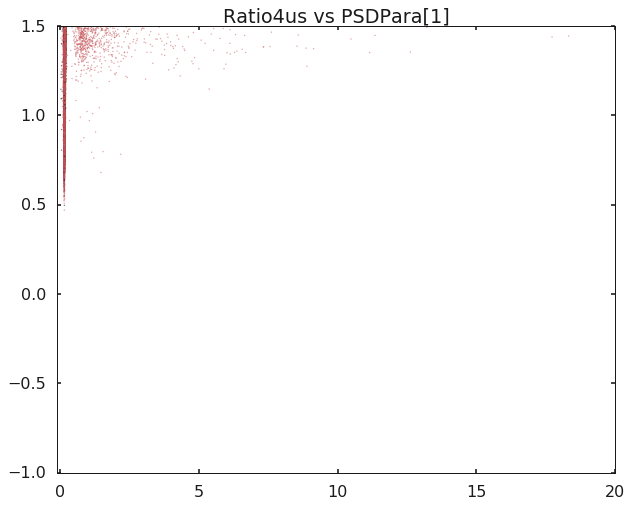

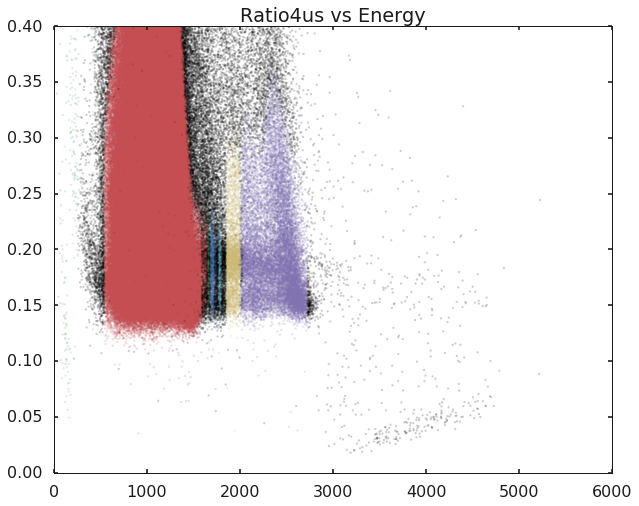

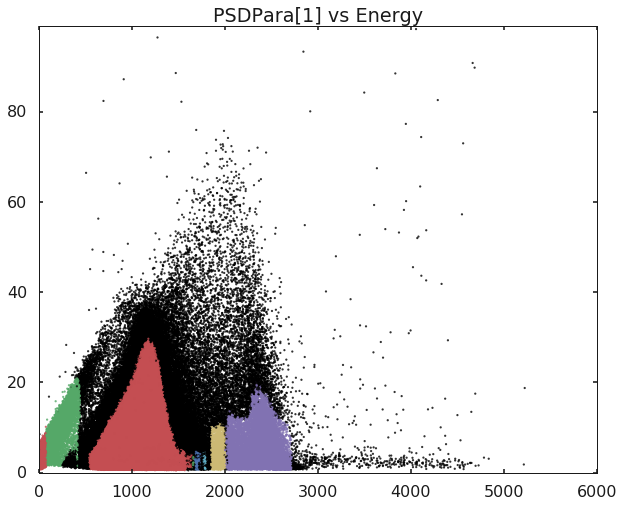

CPU times: user 1min 3s, sys: 9.45 s, total: 1min 12s
Wall time: 1min 6s


In [10]:
%%time
print(" 0 - PSDPara[1]\n 1 - PSDPara[4]\n 2 - PSDPara[7]\n 3 - PSDPara[10]\n 4 - PSDPara[13]\n 5 - PSDPara[18]\n 6 - Energy\n 7 - PSDDoubleP[16]\n 8 - RatioR\n 9 - Ratio4us\n 10 - Ratio\n 11 - DataQuality0\n 12 - DataQuality1\n 13 - DataQuality2\n 14 - DataQuality3")

plt.figure()
plt.title("Ratio4us vs PSDPara[1]")
plt.scatter(DATA[:,6], DATA[:,0], c=colors, s=2, lw=0, alpha=0.5)
plt.ylim(-1,1.5)
plt.xlim(-0.1,20)
plt.show()

plt.figure()
plt.title("Ratio4us vs Energy")
plt.scatter(DATA[:,3], DATA[:,6], c=colors, s=5, lw=0, alpha=0.2)
plt.ylim(0,0.4)
plt.xlim(0,6000)
plt.show()

plt.figure()
plt.title("PSDPara[1] vs Energy")
plt.scatter(DATA[:,3], DATA[:,0], c=colors, s=5, lw=0, alpha=0.8)
plt.ylim(0,99)
plt.xlim(0,6000)
plt.show()

# Histogram

plot te labelled data.

8
428296
()
[ 972.56848145] (1,)


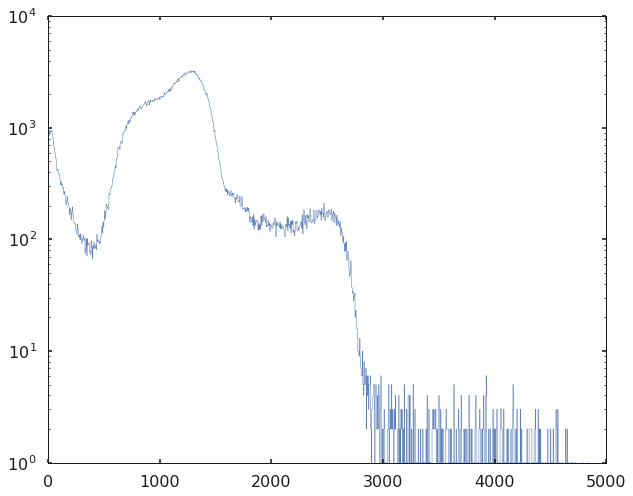

-1
(45837,)
[ 1654.03381348   514.7689209   1657.85754395 ...,  1586.02258301
  1358.89306641  1447.02209473]


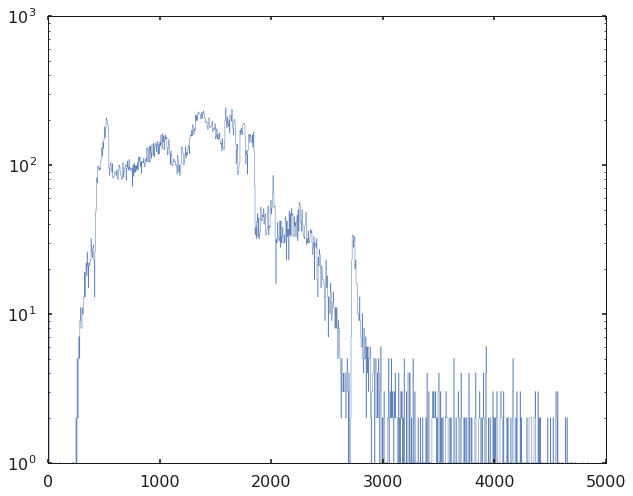

0
(6076,)
[ -1.0989728  -19.60608292 -25.47959709 ..., -22.88267899 -40.38378906
 -16.11862373]


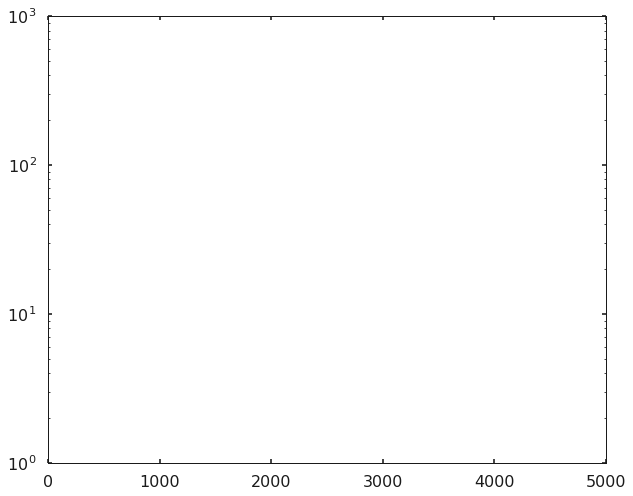

1
(11366,)
[ 109.69225311  210.8653717    83.28831482 ...,  391.8572998   206.14349365
  351.20043945]


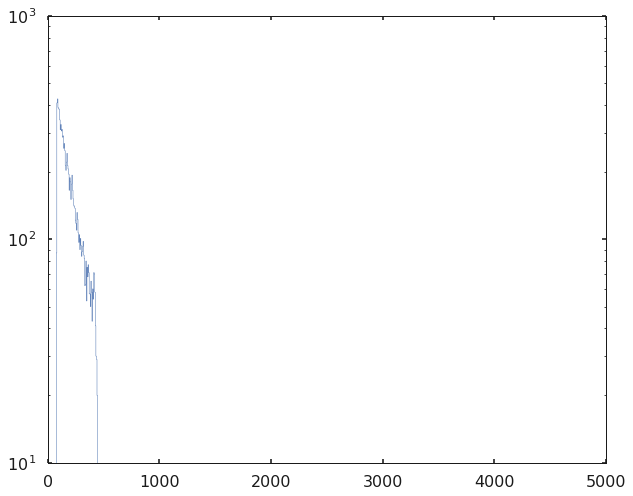

2
(11812,)
[ 23.35817146  62.82477188  10.92354488 ...,  11.82268906  71.934021
  57.05403519]


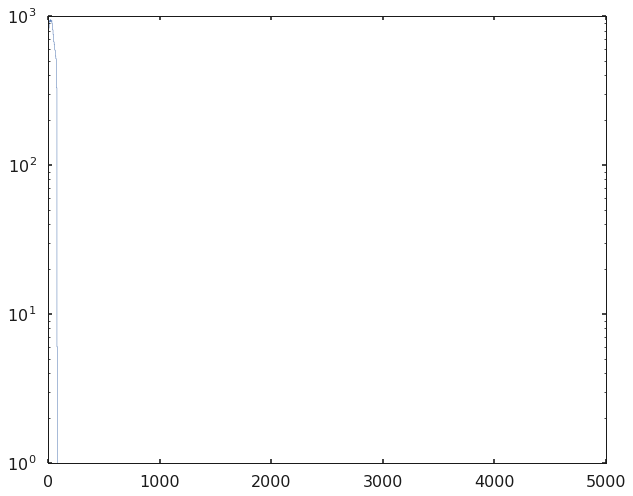

3
(16122,)
[ 2395.77270508  2538.04785156  2094.05615234 ...,  2350.0637207
  2210.23852539  2247.12011719]


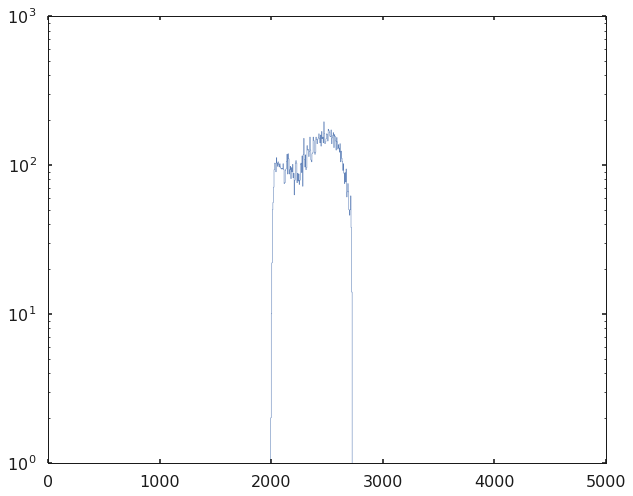

4
(3100,)
[ 1952.0579834   1898.42785645  1915.00939941 ...,  1938.82861328
  1943.12902832  1937.06726074]


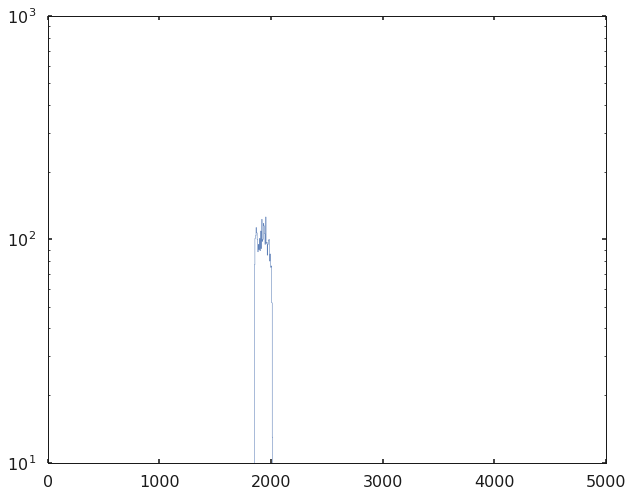

5
(433,)
[ 1784.27441406  1787.61657715  1783.97998047  1774.3260498   1785.87316895
  1787.40319824  1786.14746094  1775.70275879  1793.67651367  1790.23022461
  1794.76782227  1786.02197266  1774.55688477  1787.14477539  1787.72973633
  1797.66149902  1785.91027832  1782.69506836  1771.95227051  1781.95410156
  1772.40966797  1793.05212402  1788.63684082  1788.68615723  1775.90368652
  1785.7532959   1777.75158691  1801.34533691  1794.6505127   1784.67541504
  1786.94934082  1794.86584473  1786.08300781  1772.40429688  1778.11804199
  1782.83837891  1773.52233887  1771.53027344  1774.04858398  1777.59997559
  1786.48657227  1794.39355469  1792.47766113  1799.11889648  1799.76977539
  1785.60266113  1780.43408203  1783.67883301  1798.97705078  1790.33410645
  1801.40515137  1775.13903809  1792.97705078  1786.11242676  1775.14892578
  1794.79675293  1770.24609375  1774.51879883  1780.4342041   1773.50854492
  1790.23999023  1789.90124512  1782.71582031  1788.5333252   1776.83312988
  1

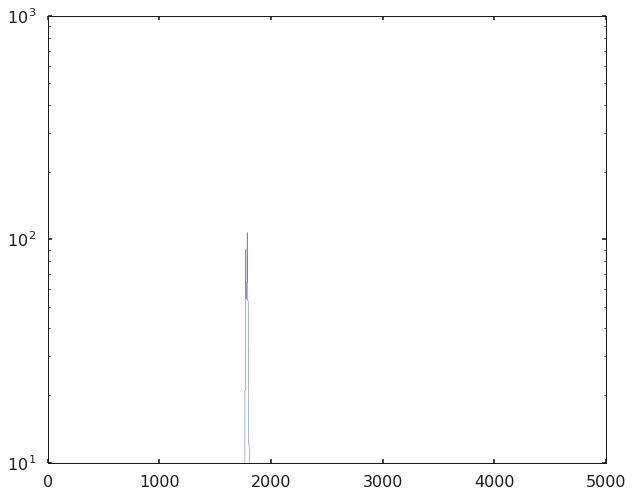

6
(1186,)
[ 1740.70068359  1733.87536621  1696.06628418 ...,  1681.11047363
  1697.73620605  1724.3638916 ]


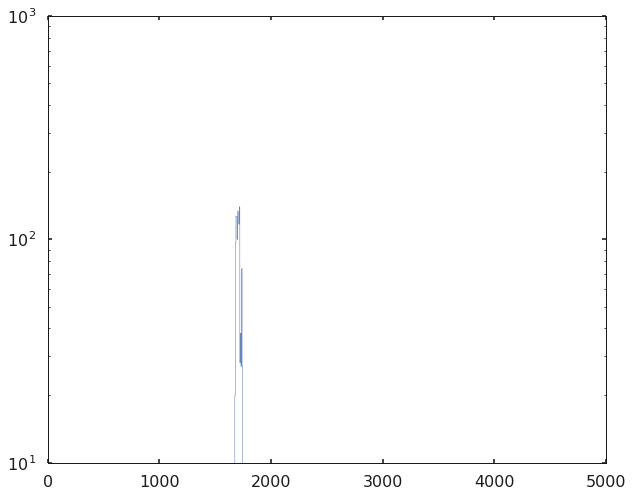

7
(281,)
[ 1650.00622559  1666.69458008  1658.15820312  1662.98425293  1659.8059082
  1664.31140137  1664.94421387  1662.13525391  1659.07250977  1669.7154541
  1662.68554688  1673.54443359  1660.6060791   1662.14013672  1672.80895996
  1657.140625    1667.22851562  1663.29956055  1664.30419922  1667.02612305
  1651.87231445  1657.42907715  1663.93457031  1673.09436035  1659.35302734
  1649.35339355  1665.33337402  1673.30688477  1661.33496094  1662.20996094
  1657.66711426  1669.39868164  1659.61096191  1672.76049805  1661.44042969
  1672.26269531  1666.66931152  1661.43505859  1664.94262695  1650.58972168
  1671.53662109  1659.31225586  1660.34753418  1654.64697266  1659.4855957
  1656.89672852  1662.2253418   1654.19689941  1659.97070312  1661.64208984
  1674.09472656  1658.83776855  1664.78442383  1673.23034668  1648.86816406
  1659.15734863  1660.65539551  1653.47827148  1651.06201172  1662.6652832
  1661.11315918  1657.77246094  1652.45214844  1655.82836914  1659.74450684
  1661.

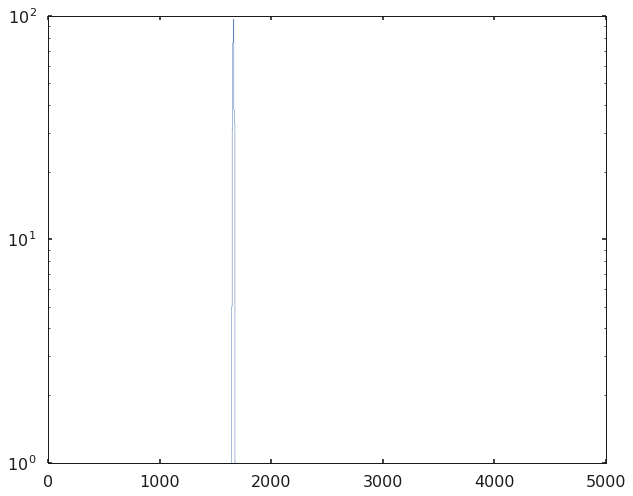

8
(331946,)
[ 1281.91442871   972.56848145  1078.77099609 ...,   933.92260742
   557.81225586   992.34906006]


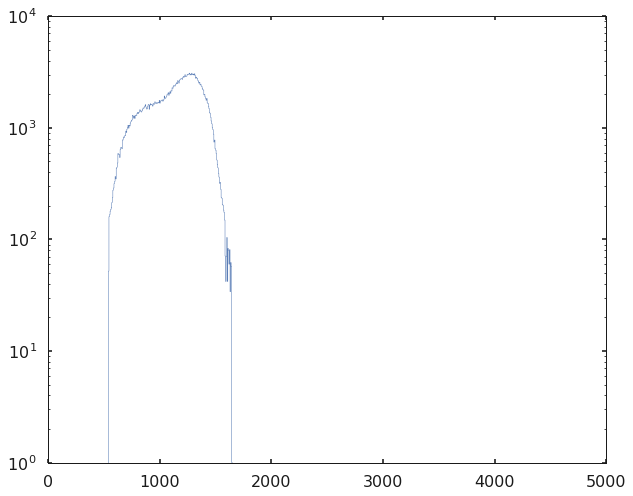

CPU times: user 2min 28s, sys: 20.7 s, total: 2min 49s
Wall time: 2min 48s


In [13]:
%%time
print(max(clusters_labels))
print(len(clusters_labels))
bins = np.arange(0,5000,5)

# print(DATA.shape)
# print(np.array(DATA[1][3]))

# E = DATA[:,3]
# ALL=np.zeros(len(clusters_labels))
ALL = np.array([])
print(DATA[1,3].shape)
test=(np.expand_dims(DATA[1,3],axis=0))
print(test,test.shape)

for i in range(len(clusters_labels)):
    E = np.expand_dims(DATA[i][3],axis=0)
#     print(E[i])
#     print(ALL)
#     ALL[i] = DATA[i,3]
    ALL = np.append(ALL,E,axis=0)
#     print(ALL)

plt.figure()
plt.hist(ALL, stacked=False, bins=bins, histtype="step")
plt.yscale("log")
plt.ylim(0,1e4)
plt.show()
    
for i in np.unique(clusters_labels):
    print(i)
    counts  =np.array([])
    for j in range(len(clusters_labels)):
        E = np.expand_dims(DATA[j][3],axis=0)
        if clusters_labels[j]==i:
            if Energy[j]>10000:
                continue
            else:
                counts = np.append(counts,E,axis=0)
    print(counts.shape)
    print(counts)
    if counts.shape!=0:
        plt.figure()
        plt.hist(counts, stacked=False, bins=bins, histtype="step")
#         plt.ylim(0,1e4)
        plt.yscale("log")
        plt.show()
    